In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv("Resources/NDXT0918.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,633.739990,665.849976,631.969971,664.190002,664.190002,0.0
1,2009-01-05,658.140015,672.940002,654.599976,665.950012,665.950012,0.0
2,2009-01-06,671.210022,694.500000,670.080017,687.130005,687.130005,0.0
3,2009-01-07,670.919983,673.989990,657.270020,662.739990,662.739990,0.0
4,2009-01-08,657.210022,665.369995,648.539978,665.099976,665.099976,0.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.count

<bound method DataFrame.count of             Date         Open         High          Low        Close  \
0     2009-01-02   633.739990   665.849976   631.969971   664.190002   
1     2009-01-05   658.140015   672.940002   654.599976   665.950012   
2     2009-01-06   671.210022   694.500000   670.080017   687.130005   
3     2009-01-07   670.919983   673.989990   657.270020   662.739990   
4     2009-01-08   657.210022   665.369995   648.539978   665.099976   
...          ...          ...          ...          ...          ...   
2510  2018-12-21  3678.120117  3678.550049  3526.399902  3539.260010   
2511  2018-12-24  3510.389893  3557.780029  3456.469971  3457.919922   
2512  2018-12-26  3494.810059  3649.389893  3451.909912  3649.389893   
2513  2018-12-27  3591.709961  3685.810059  3551.090088  3684.270020   
2514  2018-12-28  3700.040039  3744.239990  3651.139893  3683.939941   

        Adj Close  Volume  
0      664.190002     0.0  
1      665.950012     0.0  
2      687.130005 

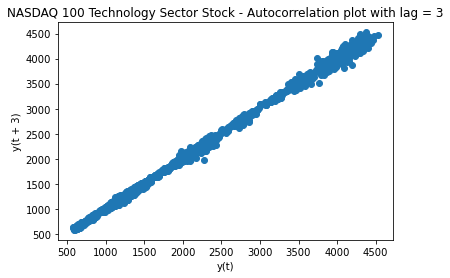

In [6]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('NASDAQ 100 Technology Sector Stock - Autocorrelation plot with lag = 3')
plt.show()

In [7]:
print(df["Close"])

0        664.190002
1        665.950012
2        687.130005
3        662.739990
4        665.099976
           ...     
2510    3539.260010
2511    3457.919922
2512    3649.389893
2513    3684.270020
2514    3683.939941
Name: Close, Length: 2514, dtype: float64


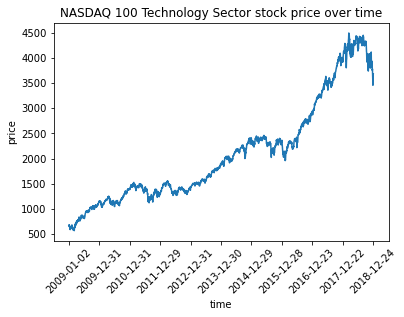

In [8]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,2514, 251), df['Date'][0:2514:251])
plt.xticks(rotation = 45)
plt.title("NASDAQ 100 Technology Sector stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [9]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\rvara\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 1840.4931921558361


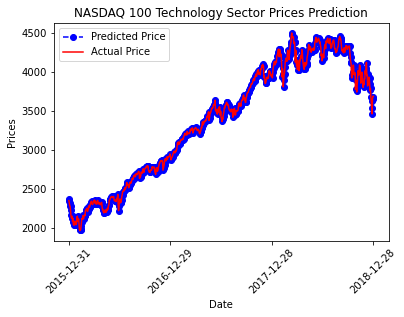

In [12]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('NASDAQ 100 Technology Sector Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1760,2514, 251), df['Date'][1760:2514:251])
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [13]:
df = pd.read_csv("Resources/NDXT0921.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,633.739990,665.849976,631.969971,664.190002,664.190002,0.0
1,2009-01-05,658.140015,672.940002,654.599976,665.950012,665.950012,0.0
2,2009-01-06,671.210022,694.500000,670.080017,687.130005,687.130005,0.0
3,2009-01-07,670.919983,673.989990,657.270020,662.739990,662.739990,0.0
4,2009-01-08,657.210022,665.369995,648.539978,665.099976,665.099976,0.0


In [14]:
df.dropna(inplace=True)

In [15]:
df.count

<bound method DataFrame.count of             Date         Open         High          Low        Close  \
0     2009-01-02   633.739990   665.849976   631.969971   664.190002   
1     2009-01-05   658.140015   672.940002   654.599976   665.950012   
2     2009-01-06   671.210022   694.500000   670.080017   687.130005   
3     2009-01-07   670.919983   673.989990   657.270020   662.739990   
4     2009-01-08   657.210022   665.369995   648.539978   665.099976   
...          ...          ...          ...          ...          ...   
3050  2021-02-16  8531.519531  8574.839844  8442.339844  8480.860352   
3051  2021-02-17  8370.469727  8403.469727  8245.490234  8349.339844   
3052  2021-02-18  8241.980469  8302.169922  8160.149902  8274.120117   
3053  2021-02-19  8358.679688  8447.540039  8330.330078  8408.879883   
3054  2021-02-22  8285.709961  8331.650391  8103.250000  8119.669922   

        Adj Close    Volume  
0      664.190002       0.0  
1      665.950012       0.0  
2      687.1

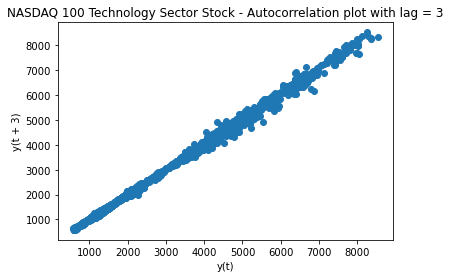

In [16]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('NASDAQ 100 Technology Sector Stock - Autocorrelation plot with lag = 3')
plt.show()

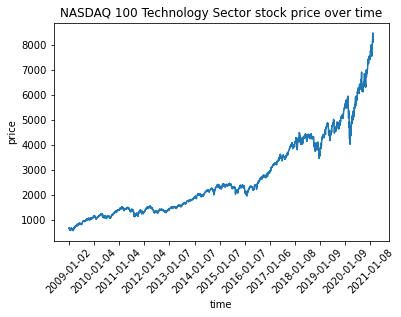

In [17]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,3054, 252), df['Date'][0:30544:252])
plt.xticks(rotation = 45)
plt.title("NASDAQ 100 Technology Sector stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [18]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\rvara\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rvara\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed

Testing Mean Squared Error is 7212.929100764542


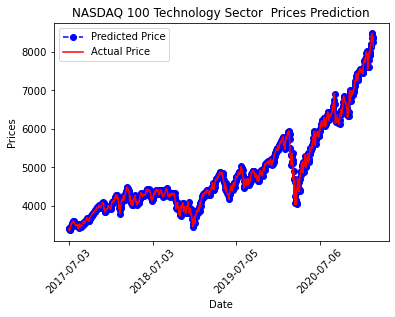

In [21]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('NASDAQ 100 Technology Sector  Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(2138,3054,252), df.Date[2138:3054:252])
plt.xticks(rotation = 45)
plt.legend()
plt.show()